In [1]:
from cluster_pockets import *
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx


holo_as_list = load_as_pickle('/Users/haotian/Dropbox/pycharm_project/DTM/2P2I/bclxl/holo1/md1.pickle')
apo_as_list = load_as_pickle('/Users/haotian/Dropbox/pycharm_project/DTM/2P2I/bclxl/apo1/md1.pickle')

apo_refined_dpocket_list = []
for dpockets in cluster_pocket(apo_as_list):
    dp = dpockets[0]
    for i in dpockets[1:]:
        dp.merge(i)
    if len(dp) > 2:
        apo_refined_dpocket_list.append(dp)
apo_refined_dpocket_list.sort(key=lambda _: len(_), reverse=True)
holo_refined_dpocket_list = []
for dpockets in cluster_pocket(holo_as_list):
    dp = dpockets[0]
    for i in dpockets[1:]:
        dp.merge(i)
    if len(dp) > 2:
        holo_refined_dpocket_list.append(dp)
holo_refined_dpocket_list.sort(key=lambda _: len(_), reverse=True)

"""
This load the pickle objects generated by Alphaspace"""

'\nThis load the pickle objects generated by Alphaspace'

<IPython.core.display.Javascript object>


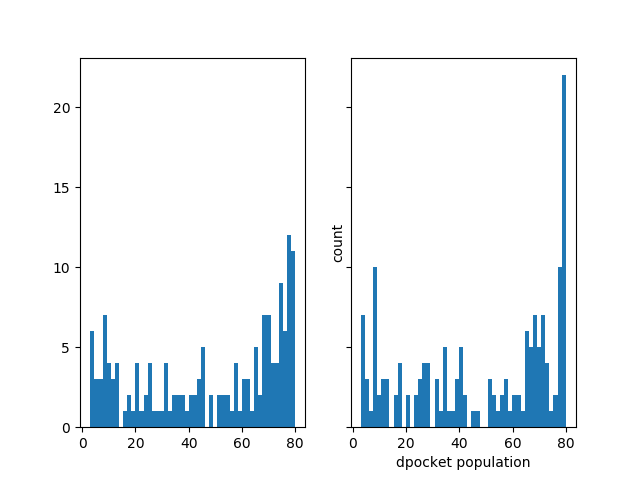

'apo left, holo right'

In [2]:
%matplotlib notebook
apo_dpocket_len = [len(p) for p in apo_refined_dpocket_list]
holo_dpocket_len = [len(p) for p in holo_refined_dpocket_list]
bins=np.histogram(np.hstack((apo_dpocket_len,holo_dpocket_len)), bins=50)[1]

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(apo_dpocket_len, bins,rwidth = width)
ax2.hist(holo_dpocket_len, bins,rwidth = width)
plt.xlabel('dpocket population')
plt.ylabel('count')

plt.show()

"""apo left, holo right"""

<IPython.core.display.Javascript object>


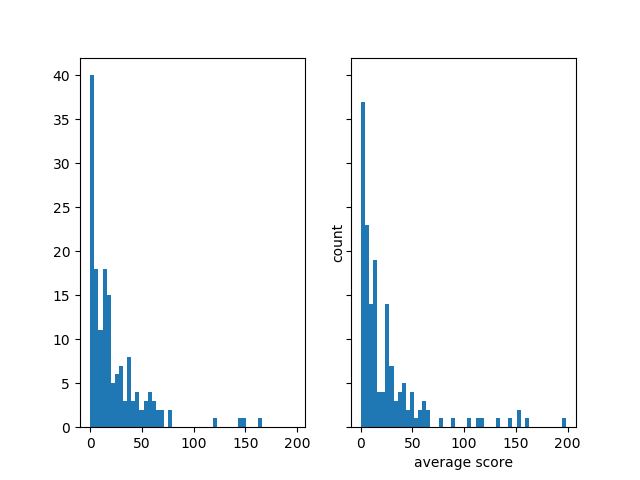

'apo left, holo right'

In [9]:
apo_dpocket_score = [p.get_average_score() for p in apo_refined_dpocket_list]
holo_dpocket_score = [p.get_average_score() for p in holo_refined_dpocket_list]
bins=np.histogram(np.hstack((apo_dpocket_score,holo_dpocket_score)), bins=50)[1]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(apo_dpocket_score, bins,rwidth = width)
ax2.hist(holo_dpocket_score, bins,rwidth = width)

plt.xlabel('average score')
plt.ylabel('count')
plt.show()

"""apo left, holo right"""

<IPython.core.display.Javascript object>


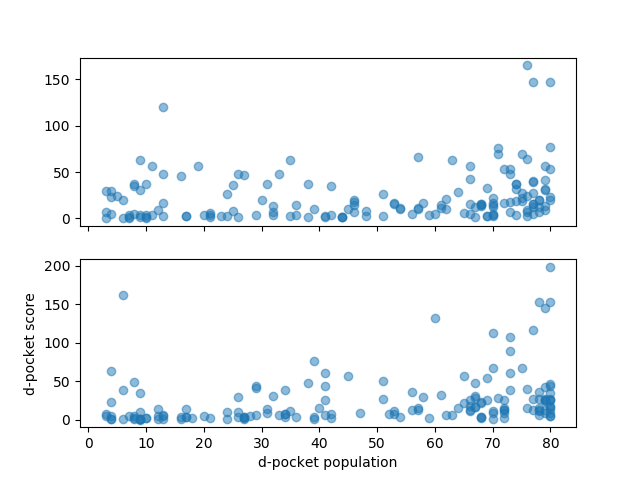

In [8]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter([len(pi) for pi in apo_refined_dpocket_list], [pj.get_average_score() for pj in apo_refined_dpocket_list], alpha=0.5)
axarr[1].scatter([len(pi) for pi in holo_refined_dpocket_list], [pj.get_average_score() for pj in holo_refined_dpocket_list], alpha=0.5)
plt.xlabel('d-pocket population')
plt.ylabel('d-pocket score')
plt.show()

In [15]:
apo_patches = get_patches(dpocket_list=apo_refined_dpocket_list,core_score_cutoff=max([p.get_average_score() for p in apo_refined_dpocket_list])/2)
holo_patches = get_patches(dpocket_list=holo_refined_dpocket_list,core_score_cutoff=max([p.get_average_score() for p in holo_refined_dpocket_list])/2)
for i in apo_patches:
    print(len(apo_patches[i]),sum([apo_refined_dpocket_list[_].get_average_score() for _ in apo_patches[i]]))
print()
for i in holo_patches:
    print(len(holo_patches[i]),sum([holo_refined_dpocket_list[_].get_average_score() for _ in holo_patches[i]]))

92 1767.3849322
74 1660.58729237
80 1814.96749031
56 951.910714343

29 727.567207037
37 675.456253877
28 525.065448338
33 675.046184443
31 572.509079367
41 829.401964172
44 1001.58198719
44 919.221085121
44 693.566549816
